In [1]:
import eDiskplot as eplot
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import AsinhStretch, ImageNormalize
from eDisk_source_dict import source_dict
import analysis_utils as au
from qdisk.product import calculate_averaged_spectra, calculate_pvdiagram, calculate_moment, calculate_radial_profile
from qdisk.model import Keplerian_velocity
import qdisk.utils as utils
from qdisk.plot import plot_2D_map
from qdisk.classes import FitsImage
from qdisk.utils import is_within
from matplotlib import ticker
from qdisk.plot import Map
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
config = "SBLB"
line = "SO"
robust = 1.0
vsys = source_dict[source]["v_sys"]
center_coord = source_dict[source]["radec"]
distance = source_dict[source]["distance"]
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust)
contname = au.customimagepath + au.get_image_basename(source, config, "continuum", robust=1.0)

cont = FitsImage(contname, xlim=(-8, 8), ylim=(-8, 8))
cont.estimate_rms(rmin=8)

In [2]:
savefilename = au.VADPpath + au.get_image_basename(source, config, line, robust=robust)

calculate_moment(
    imagename=imagename,
    moments=[1],
    threshold=4,
    save=True,
    savefilename=savefilename,
    nchunks=4
)

Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment 1...
Going to compute with 4 chunks...
Computing chunk 0...
Computing chunk 1...
Computing chunk 2...
Computing chunk 3...
Restoring the original array...


{1: (array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]))}

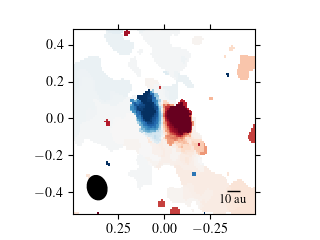

In [12]:
r = 0.5
vrange = 6
rotmap = Map(savefilename.replace(".fits", "_M1.fits"), data_scaling_factor=1e-3, center_coord=center_coord, xlim=(-r, r), ylim=(-r, r))
rotmap.plot_colormap(cmap=eplot.cmap["M1"], vmin=vsys-vrange, vmax=vsys+vrange)
rotmap.add_beam(color="black")
rotmap.add_scalebar(10/distance, "10 au", color="black")

In [2]:
from casatasks import imsubimage, exportfits

for type in ["image", "mask", "pb", "pbcor"]:
    print(type)
    imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust, type=type)
    imsubimage(imagename=imagename, outfile=imagename.replace(".fits", ".sub"), overwrite=True, chans="137~200")
    print("exporting")
    exportfits(imagename=imagename.replace(".fits", ".sub"), fitsimage=imagename, overwrite=True, dropdeg=True)

image
exporting
mask
exporting
pb
exporting
pbcor
exporting


In [3]:
for sigma in [None, 1, 2, 3]:
    if sigma is None:
        savefilename = au.VADPpath + au.get_image_basename(source, config, line, robust=robust)
    else:
        savefilename = au.VADPpath + au.get_image_basename(source, config, line, robust=robust).replace(".fits", "_{}sigma.fits".format(sigma))
        
    calculate_moment(
        imagename=imagename,
        moments=[0],
        threshold=sigma,
        save=True,
        savefilename=savefilename,
        nchunks=4
    )


Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment 0...
Going to compute with 4 chunks...
Computing chunk 0...
Computing chunk 1...
Computing chunk 2...
Computing chunk 3...
Restoring the original array...
Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment 0...
Going to compute with 4 chunks...
Computing chunk 0...
Computing chunk 1...
Computing chunk 2...
Computing chunk 3...
Restoring the original array...
Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment 0...
Going to compute with 4 chunks...
Computing chunk 0...
Computing chunk 1...
Computing chunk 2...
Computing chunk 3...
Restoring the original array...
Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment 0...
Go

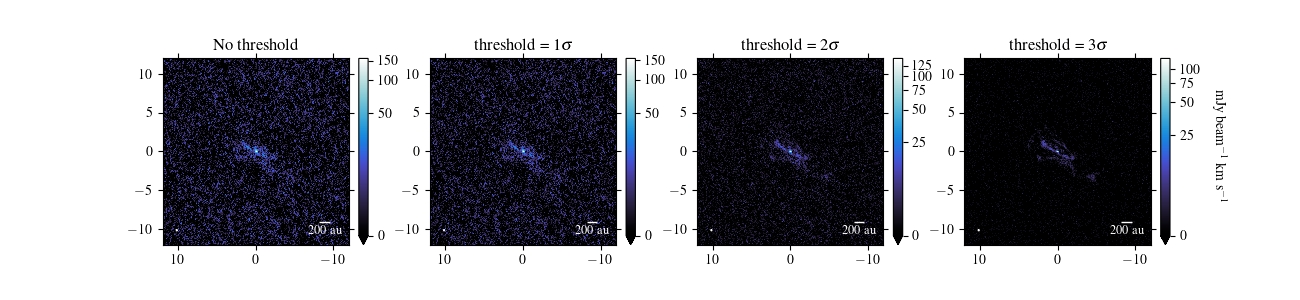

In [10]:
fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust).replace(".fits", "_M0.fits")
rmax = 12
# fig = plt.figure(figsize=(10, 3))
# axes = ImageGrid(fig, rect=111, nrows_ncols=(1, 4), axes_pad=0.2, cbar_mode="single")
fig, axes = plt.subplots(1, 4, figsize=(13, 3), gridspec_kw={"wspace": 0.3})

for sigma, ax in zip([None, 1, 2, 3], axes):
    if sigma is None:
        fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust).replace(".fits", "_M0.fits")
    else:
        fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust).replace(".fits", "_{}sigma_M0.fits".format(sigma))
    integmap = Map(fitsname=fitsname, ax=ax, center_coord=center_coord, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
    integmap.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0, stretch=AsinhStretch(a=0.05))
    integmap.add_beam()
    integmap.add_scalebar(scale=200/distance, text="200 au")
    integmap.add_colorbar(label="mJy beam$^{-1}$ km s$^{-1}$" if sigma == 3 else None, labelpad=20)

    ax.set_title("threshold = {}$\sigma$".format(sigma) if sigma is not None else "No threshold")
    # ax.set_aspect(1./ax.get_data_ratio(), adjustable="box")

# axes.cbar_axes[0].colorbar()

In [11]:
savefilename = au.VADPpath + au.get_image_basename(source, config, line, robust=robust)
calculate_moment(
    imagename=imagename,
    moments=["q"],
    save=True,
    savefilename=savefilename,
    nchunks=None
)

Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment q...


/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:68: RuntimeWarning: invalid value encountered in true_divide
  x_max = idx - 0.5 * a1 / a2
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:69: RuntimeWarning: invalid value encountered in true_divide
  y_max = a0 - 0.25 * a1**2 / a2
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:109: RuntimeWarning: invalid value encountered in true_divide
  x_max_var = 0.0625*(a1**2*(df_minus + df_plus) +
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:113: RuntimeWarning: invalid value encountered in true_divide
  y_max_var = 0.015625*(a1**4*(df_minus + df_plus) +


{'q': array([[[-10000.00005316, -10000.00005316, -10000.00005316, ...,
          -10000.00005316, -10000.00005316, -10000.00005316],
         [-10000.00005316, -10000.00005316, -10000.00005316, ...,
          -10000.00005316, -10000.00005316, -10000.00005316],
         [-10000.00005316, -10000.00005316, -10000.00005316, ...,
          -10000.00005316, -10000.00005316, -10000.00005316],
         ...,
         [-10000.00005316, -10000.00005316, -10000.00005316, ...,
          -10000.00005316, -10000.00005316, -10000.00005316],
         [-10000.00005316, -10000.00005316, -10000.00005316, ...,
          -10000.00005316, -10000.00005316, -10000.00005316],
         [-10000.00005316, -10000.00005316, -10000.00005316, ...,
          -10000.00005316, -10000.00005316, -10000.00005316]],
 
        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                

Text(0.5, 1.0, 'SO ($J_N=$ $6_5$--$5_4$)')

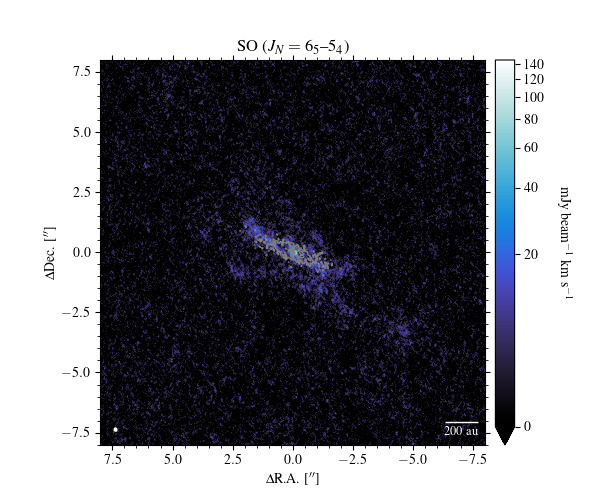

In [21]:
# integrated intensity map
fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust).replace(".fits", "_2sigma_M0.fits")
r = 8
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=100)
rotmap = Map(fitsname=fitsname, ax=ax, center_coord=center_coord, xlim=(-r, r), ylim=(-r, r))
rotmap.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0, stretch=AsinhStretch(a=0.05))
rotmap.add_beam(color="white")
rotmap.add_scalebar(scale=200/distance, text="200 au", color="white")
rotmap.add_colorbar(label="mJy beam$^{-1}$ km s$^{-1}$", labelpad=20)
rotmap.overlay_contour(contname, levels=np.array([6, 12, 50, 200])*cont.rms, linewidth=1.0)
rotmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)
rotmap.set_ticker(minor=True, majornticks=7, minornticks=5)

ax.set_title("SO ($J_N=$ $6_5$--$5_4$)")

In [16]:
# rotation map mask

rmax = 8
vrange = 5

### sigma clip for hybrid mask; take a while
cubename = au.customimagepath + au.get_image_basename(source, config, line, robust=robust)

print("Loading data...")
cube = FitsImage(cubename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
cube.shift_phasecenter_toward(center_coord)

print("Generating threshold mask...")
cube.estimate_rms(edgenchan=3)
cube.get_threshold_mask(threshold=4)
mask = np.sum(cube.threshold_mask, axis=0) > 0
print("Done.")

Loading data...
Generating threshold mask...
Done.


Text(0.5, 1.0, 'C$^{18}$O ($J=$ 2--1)')

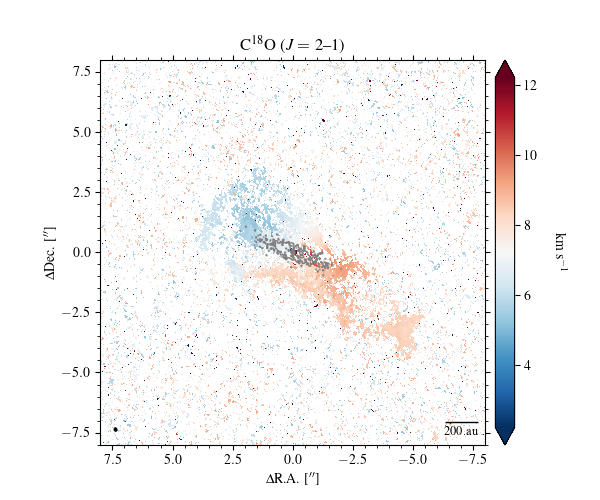

In [19]:
# rotation map
fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust).replace(".fits", "_v0.fits")
r = 8
vrange=5
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=100)
rotmap = Map(fitsname=fitsname, ax=ax, data_scaling_factor=1e-3, center_coord=center_coord, xlim=(-r, r), ylim=(-r, r))
rotmap.mask(vmin=vsys-2, vmax=vsys+2, user_mask=mask, combine="or")
rotmap.plot_colormap(cmap=eplot.cmap["M1"], vmin=vsys-vrange, vmax=vsys+vrange)
rotmap.add_beam(color="black")
rotmap.add_scalebar(scale=200/distance, text="200 au", color="black")
rotmap.add_colorbar(label="km s$^{-1}$", labelpad=20)
rotmap.overlay_contour(contname, levels=np.array([6, 12, 50, 200])*cont.rms, linewidth=1.0)
rotmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)
rotmap.set_ticker(minor=True, majornticks=7, minornticks=5)

ax.set_title("C$^{18}$O ($J=$ 2--1)")

Text(0.5, 1.0, 'C$^{18}$O ($J=$ 2--1)')

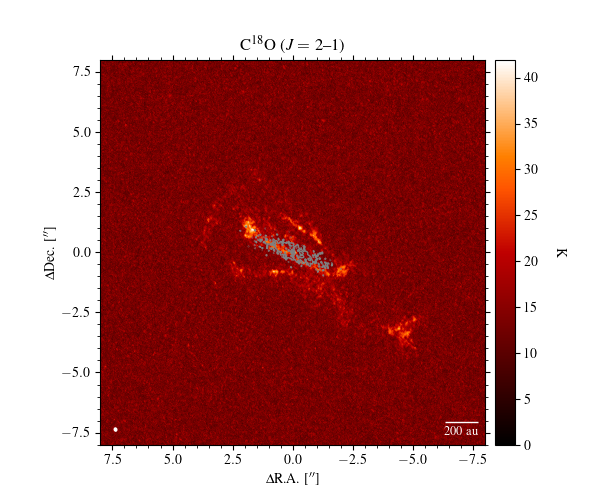

In [26]:
# peak intensity map
fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust).replace(".fits", "_Fnu.fits")
r = 8
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=100)
peakmap = Map(fitsname=fitsname, ax=ax, data_scaling_factor=1e3, center_coord=center_coord, xlim=(-r, r), ylim=(-r, r))
# rotmap.mask(vmin=vsys-2, vmax=vsys+2, user_mask=mask, combine="or")
peakmap.convert_unit()
peakmap.plot_colormap(cmap=eplot.cmap["M8"], vmin=0.0)#, stretch=AsinhStretch(a=0.1))
peakmap.add_beam(color="white")
peakmap.add_scalebar(scale=200/distance, text="200 au", color="white")
peakmap.add_colorbar(label="K", labelpad=20)
peakmap.overlay_contour(contname, levels=np.array([6, 12, 50, 200])*cont.rms, linewidth=1.0)
peakmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)
peakmap.set_ticker(minor=True, majornticks=7, minornticks=5)

ax.set_title("C$^{18}$O ($J=$ 2--1)")

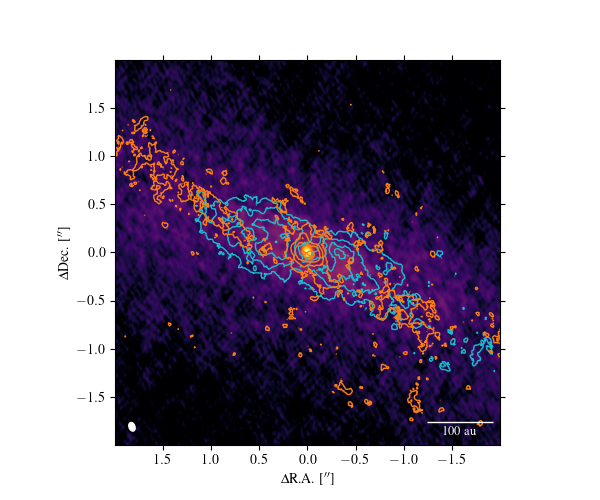

In [3]:
### comparison
r = 2

fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=100)
compmap = Map(contname, ax=ax, data_scaling_factor=1e3, center_coord=center_coord, xlim=(-r, r), ylim=(-r, r))
compmap.plot_colormap(cmap=eplot.cmap["continuum"], vmin=0.0, stretch=AsinhStretch(a=0.01))
compmap.add_beam()
compmap.add_scalebar(100/distance, "100 au")
compmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)


linelist = ["C18O", "SO"]
rms = {"12CO": 3.5, "13CO": 3.90, "C18O": 2.11, "SO": 3.19}
robust = {"12CO": 0.5, "13CO": 0.5, "C18O": 1.0, "SO": 1.0}
color = {"12CO": "tab:green", "13CO": "tab:olive", "C18O": "tab:cyan", "SO": "tab:orange"}
levels = {"12CO": np.array([5, 10, 20, 50, 100, 200, 500]), "13CO": np.array([5, 10, 20, 30]), "C18O": np.array([10, 15, 20, 25]), "SO": np.array([4, 10, 20, 40, 60])}
for line in linelist:
    fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust[line]).replace(".fits", "_2sigma_M0.fits")
    compmap.overlay_contour(fitsname, levels=levels[line]*rms[line], color=color[line])

In [4]:
fig.savefig(au.figurepath + "continuum_C18O_SO_comparison.pdf", bbox_inches="tight", pad_inches=0.01)

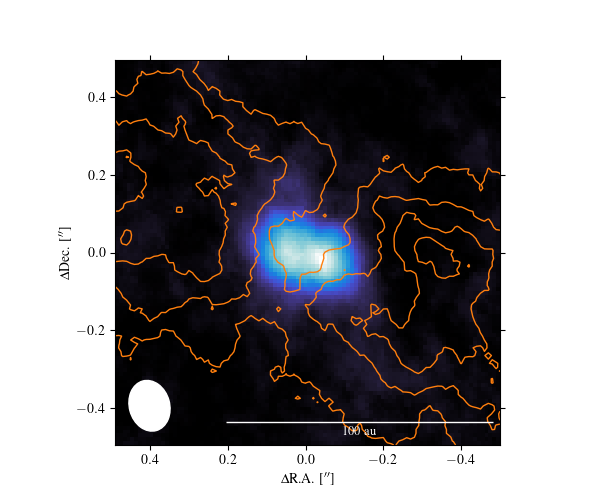

In [14]:
### comparison
r = 0.5
PA = 67.2
incl = 70.2
line = "SO"
linelist = ["C18O"]
rms = {"12CO": 3.5, "13CO": 3.90, "C18O": 2.11, "SO": 3.19}
robust = {"12CO": 0.5, "13CO": 0.5, "C18O": 1.0, "SO": 1.0}
color = {"12CO": "tab:green", "13CO": "tab:olive", "C18O": "tab:cyan", "SO": "tab:orange"}

# SO colormap
fig, ax = plt.subplots(1, 1, figsize=(6, 5), dpi=100)

fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust[line]).replace(".fits", "_2sigma_M0.fits")
compmap = Map(fitsname, ax=ax, data_scaling_factor=1e3, center_coord=center_coord, xlim=(-r, r), ylim=(-r, r))
compmap.plot_colormap(cmap=eplot.cmap["M0"], vmin=0.0)
compmap.add_beam()
compmap.add_scalebar(100/distance, "100 au")
compmap.set_labels(xlabel=eplot.RAlabel, ylabel=eplot.Declabel)



levels = {"12CO": np.array([5, 10, 20, 50, 100, 200, 500]), "13CO": np.array([5, 10, 20, 30]), "C18O": np.array([10, 15, 20, 25]), "SO": np.array([4, 10, 20, 40, 60])}
for line in linelist:
    fitsname = au.VADPpath + au.get_image_basename(source, config, line=line, robust=robust[line]).replace(".fits", "_2sigma_M0.fits")
    compmap.overlay_contour(fitsname, levels=levels[line]*rms[line], color="tab:orange")

# r, t = compmap.get_disk_coord(PA=88, incl=incl)
# compmap.ax.contour(compmap.x, compmap.y, t, levels=np.array([0, 180]), colors="white")
# print(np.nanmax(r), np.nanmin(r))